In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
###### NETOYAGE ET PRÉPARATION DES DONNÉES ######
df = pd.read_csv('data.csv') #chargement des données
df['tax'] = df['tax'].fillna(df['tax'].mode()[0])
df['gender'] = df['gender'].fillna('Inconnu')
df['country'] = df['country'].fillna('Inconnu')
df['price_paid'] = (
    df['price_paid']
    .astype(str)
    .str.replace('$','', regex = False)
    .str.replace(',','', regex = False)
    .astype(float)
)
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,5.36,20.0
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,8.32,20.0
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,9.24,20.0
...,...,...,...,...,...,...,...,...,...,...
995,996,03/24/2021,Duff,Errigo,derrigorn@elpais.com,Female,193.84.247.144,France,3.63,20.0
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,Inconnu,4.59,20.0
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0
998,999,03/17/2021,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,0.183.63.11,United States,5.81,20.0


In [3]:
gender = (
    df
    .groupby('gender')['price_paid']
    .sum()
)
gender

gender
Female     3165.26
Inconnu     463.06
Male       2833.61
Name: price_paid, dtype: float64

Text(0, 0.5, '')

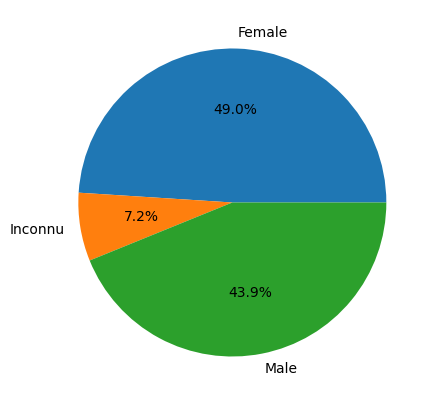

In [4]:
plt.figure(figsize = (10,5))
gender.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')

In [5]:
usa = df[df['country'] == 'United States' ]
usa
usa['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')

C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\1159025045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')


In [6]:
usa_j = (
    usa
    .groupby('date')
    .size()
    .sort_index(ascending = True)
)


In [7]:
usa_pv = usa_j[usa_j > 15]

In [8]:
usa_pv 

date
2021-03-07    16
2021-03-16    17
2021-03-17    17
2021-03-20    19
2021-03-27    18
dtype: int64

In [9]:
usa_mars = usa[usa['date'].isin(['2021-03-07','2021-03-16','2021-03-17','2021-03-27','2021-03-20'])]

C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\3884592307.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  usa_mars = usa[usa['date'].isin(['2021-03-07','2021-03-16','2021-03-17','2021-03-27','2021-03-20'])]


In [10]:
_2021_03_20 = usa_mars[usa_mars['date'].isin(['2021-03-20'])]

C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\422246074.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  _2021_03_20 = usa_mars[usa_mars['date'].isin(['2021-03-20'])]


In [11]:
_2021_03_20

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
17,18,2021-03-20,Esta,Boulden,ebouldenh@posterous.com,Inconnu,220.109.140.190,United States,3.16,20.0
33,34,2021-03-20,Cam,Francescoccio,cfrancescocciox@si.edu,Female,177.11.5.62,United States,5.34,20.0
37,38,2021-03-20,Byram,Dudman,bdudman11@barnesandnoble.com,Male,37.111.199.4,United States,9.50,20.0
44,45,2021-03-20,Maribelle,Shiel,mshiel18@gravatar.com,Male,193.194.124.171,United States,3.37,20.0
62,63,2021-03-20,Marlee,Dyas,mdyas1q@instagram.com,Male,110.71.126.71,United States,7.68,20.0
96,97,2021-03-20,Devonne,Clowsley,dclowsley2o@ebay.co.uk,Female,118.214.156.60,United States,4.71,20.0
197,198,2021-03-20,Briano,Stapels,bstapels5h@archive.org,Male,0.139.242.150,United States,7.41,20.0
266,267,2021-03-20,Malinde,Croose,mcroose7e@flickr.com,Female,231.105.40.170,United States,8.65,20.0
315,316,2021-03-20,Saw,Brookesbie,sbrookesbie8r@edublogs.org,Male,57.2.187.97,United States,3.09,20.0
396,397,2021-03-20,Marshall,Kuhn,mkuhnb0@ft.com,Female,218.65.196.247,United States,5.66,20.0


In [12]:
_03_20_g = (
    _2021_03_20
    .groupby('gender')
    .size()
    .sort_values(ascending = False)
)
_03_20_g

gender
Female     11
Male        7
Inconnu     1
dtype: int64

<Axes: >

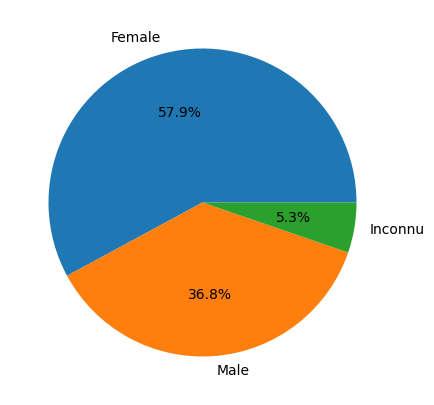

In [13]:
plt.figure(figsize = (10,5))
_03_20_g.plot(kind = 'pie', autopct = '%1.1f%%')

In [14]:
usa_03_20_g_pp = (
    _2021_03_20
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
ttpp = usa_03_20_g_pp.sum()

In [15]:
len(usa_03_20_g_pp)

3

In [16]:
print(f"{ttpp}$")

120.85999999999999$


C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\38770758.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Femme:{usa_03_20_g_pp[0]}$\n"
C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\38770758.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Homme:{usa_03_20_g_pp[1]}$\n"
C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\38770758.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Iconnu:{usa_03_20_g_pp[2]

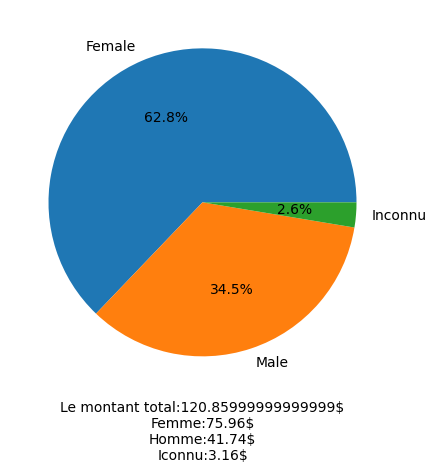

In [17]:
plt.figure(figsize = (10,5))
usa_03_20_g_pp.plot(kind = 'pie', autopct = '%1.1f%%')
plt.xlabel(f"Le montant total:{ttpp}$\n"
          f"Femme:{usa_03_20_g_pp[0]}$\n"
          f"Homme:{usa_03_20_g_pp[1]}$\n"
          f"Iconnu:{usa_03_20_g_pp[2]}$")
plt.ylabel('')
plt.show()

In [18]:
df['price_paid'].nlargest(5)

168    10.00
418    10.00
54      9.99
196     9.99
287     9.98
Name: price_paid, dtype: float64

In [19]:
mars_2021_03_17 = usa_mars[usa_mars['date'].isin(['2021-03-17'])]

C:\Users\TIMaystar\AppData\Local\Temp\ipykernel_23336\2688697674.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  mars_2021_03_17 = usa_mars[usa_mars['date'].isin(['2021-03-17'])]


In [20]:
mars_2021_03_17vp = mars_2021_03_17['price_paid'].nlargest(3)


In [21]:
mars_2021_03_17

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
2,3,2021-03-17,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0
40,41,2021-03-17,Em,Dupoy,edupoy14@foxnews.com,Male,59.105.241.85,United States,3.45,20.0
53,54,2021-03-17,Ange,Purvess,apurvess1h@ucsd.edu,Male,190.14.100.103,United States,6.57,20.0
61,62,2021-03-17,Mill,Haughan,mhaughan1p@ox.ac.uk,Female,75.242.73.109,United States,6.17,20.0
94,95,2021-03-17,Shannan,Giacomozzo,sgiacomozzo2m@psu.edu,Female,101.143.192.29,United States,5.80,20.0
120,121,2021-03-17,Tasha,Monkhouse,tmonkhouse3c@chronoengine.com,Male,201.119.190.49,United States,8.97,20.0
138,139,2021-03-17,Greg,Bernucci,gbernucci3u@themeforest.net,Male,58.166.190.147,United States,3.03,20.0
144,145,2021-03-17,Beale,Jannaway,bjannaway40@nba.com,Female,201.218.125.4,United States,5.87,20.0
230,231,2021-03-17,Fairleigh,Gouny,fgouny6e@jimdo.com,Female,52.75.9.48,United States,6.93,20.0
434,435,2021-03-17,Clara,Dawidowicz,cdawidowiczc2@smh.com.au,Male,179.186.255.233,United States,7.66,20.0


In [22]:
mars_2021_03_17[mars_2021_03_17['price_paid'].isin(mars_2021_03_17vp)] # ici on veut rechercher tous les valeurs, on a pas besoin d'utiliser un *

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
120,121,2021-03-17,Tasha,Monkhouse,tmonkhouse3c@chronoengine.com,Male,201.119.190.49,United States,8.97,20.0
434,435,2021-03-17,Clara,Dawidowicz,cdawidowiczc2@smh.com.au,Male,179.186.255.233,United States,7.66,20.0
675,676,2021-03-17,Corine,Sictornes,csictornesir@google.com.hk,Female,111.204.252.75,United States,8.68,20.0


In [23]:
mars_2021_03_17vp.iloc[0] # l'index de cette Series un peu bizzare, mais c'est normal, si  on veut l'index classique on peut utiliser .iloc

np.float64(8.97)

In [24]:
mars_2021_03_17vp

120    8.97
675    8.68
434    7.66
Name: price_paid, dtype: float64

In [25]:
mars_2021_03_17[mars_2021_03_17['price_paid'] == 8.97]

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
120,121,2021-03-17,Tasha,Monkhouse,tmonkhouse3c@chronoengine.com,Male,201.119.190.49,United States,8.97,20.0


In [26]:
df[df['ip_address'] == '160.119.8.119']

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,5.36,20.0


In [27]:
df['price_paid'][1]

np.float64(8.32)

In [28]:
df['tax'][1]

np.float64(20.0)

In [29]:
df['price_paid'][1] - (df['tax'][1] * (df['tax'][1] / 100 ))

np.float64(4.32)

In [30]:
df['tax'] * (df['tax'][1] / 100)

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
995    4.0
996    4.0
997    4.0
998    4.0
999    4.0
Name: tax, Length: 1000, dtype: float64

In [31]:
df['price_paid'][1] - (df['price_paid'][1] * df['tax'][1] / 100) #La bonne formule (taxe sur le prix)
''' Pourquoi ça marche ? ça marche parce que nous appliquons ici la formule correcte de la taxe
'''

np.float64(6.656000000000001)

In [36]:
df['price_net'] = df['price_paid'] * (1 - df['tax'] / 100) # ici, on fait une chose une chose très intéressant, la création d'une nouvelle colonne pour stocker
# les résultats de notre opération entre colonnes ('price_paid' - 'tax'), différement au premier exemple qui nous opérons seulement sur un valeur des deux colonnes,
# ici nous opérons sur tous les valeurs des deux colonnes, voilá pourquoi il est intéressant de créer une nouvelle colonne pour stocker ces nouveaux valeurs

In [45]:
df['price_tax'] = df['price_paid'] - df['price_net']# nous applicons ici le même principe du cas di-dessus, nous créeons une nouvelle coloque pour stocker
#les résultats d'une nouvelle opération entre colonnes, dans la colonne 'price_tax' nous stockons le résultat de subtration entre 'price_paid' et 'price_tax'
#pour que nous puissons découvrir le valeur réel de tax sur 'price_paid'

In [46]:
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax,price_net,price_tax
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,5.36,20.0,4.288,1.072
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,8.32,20.0,6.656,1.664
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0,2.984,0.746
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0,2.960,0.740
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,9.24,20.0,7.392,1.848
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,03/24/2021,Duff,Errigo,derrigorn@elpais.com,Female,193.84.247.144,France,3.63,20.0,2.904,0.726
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,Inconnu,4.59,20.0,3.672,0.918
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0,6.032,1.508
998,999,03/17/2021,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,0.183.63.11,United States,5.81,20.0,4.648,1.162


In [43]:
g_s_taxe = (
    df
    .groupby('gender')['price_net']
    .sum()
    .sort_values(ascending = False)
)
g_s_taxe

gender
Female     2532.208
Male       2266.888
Inconnu     370.448
Name: price_net, dtype: float64

In [44]:
g_a_taxe = (
    df
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
g_a_taxe

gender
Female     3165.26
Male       2833.61
Inconnu     463.06
Name: price_paid, dtype: float64

In [47]:
g_a_taxe - g_s_taxe

gender
Female     633.052
Male       566.722
Inconnu     92.612
dtype: float64

In [48]:
df_plot = pd.DataFrame({
    'Avant taxe': g_a_taxe,
    'Après taxe': g_s_taxe
})

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Inconnu')])

<Figure size 1000x500 with 0 Axes>

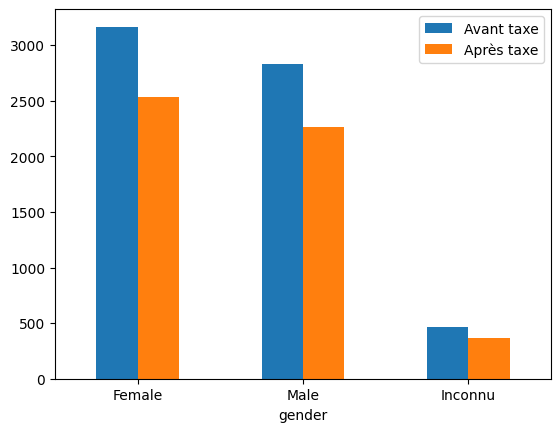

In [54]:
plt.figure(figsize = (10,5))
df_plot.plot(kind = 'bar')
plt.xticks(rotation = 0)

In [56]:
df_plot

,Avant taxe,Après taxe
gender,,
Female,3165.26,2532.208
Male,2833.61,2266.888
Inconnu,463.06,370.448


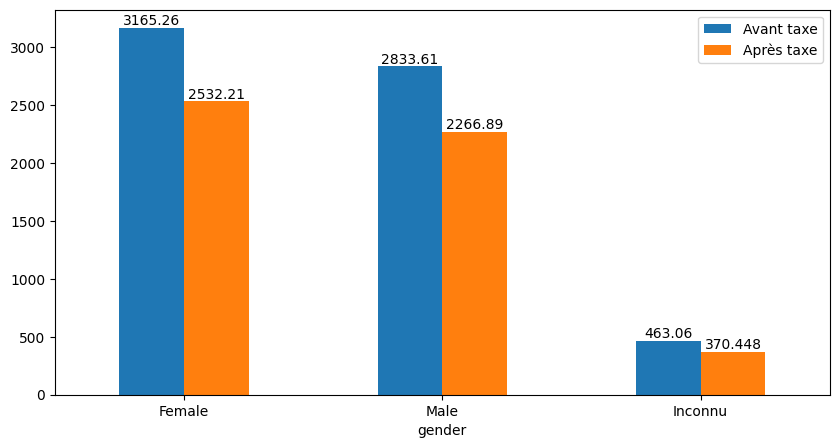

In [64]:
ax = df_plot.plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=0)

# Ajouter les valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [65]:
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax,price_net,price_tax
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,5.36,20.0,4.288,1.072
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,8.32,20.0,6.656,1.664
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0,2.984,0.746
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0,2.960,0.740
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,9.24,20.0,7.392,1.848
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,03/24/2021,Duff,Errigo,derrigorn@elpais.com,Female,193.84.247.144,France,3.63,20.0,2.904,0.726
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,Inconnu,4.59,20.0,3.672,0.918
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0,6.032,1.508
998,999,03/17/2021,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,0.183.63.11,United States,5.81,20.0,4.648,1.162


In [69]:
country_price_tax = (
    df
    .groupby('country')['price_tax']
    .sum()
    .sort_values(ascending = False)
)
country_price_tax

country
France           523.922
United States    436.734
Canada           203.490
Morocco           72.594
Inconnu           55.646
Name: price_tax, dtype: float64

In [70]:
country_price_paid = (
    df
    .groupby('country')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
country_price_paid

country
France           2619.61
United States    2183.67
Canada           1017.45
Morocco           362.97
Inconnu           278.23
Name: price_paid, dtype: float64

In [71]:
country_price_net = (
    df
    .groupby('country')['price_net']
    .sum()
    .sort_values(ascending = False)
)
country_price_net

country
France           2095.688
United States    1746.936
Canada            813.960
Morocco           290.376
Inconnu           222.584
Name: price_net, dtype: float64

In [72]:
country_price = pd.DataFrame({
    'prix taxe': country_price_tax,
    'prix payé': country_price_paid,
    'prix sans taxe': country_price_net
})
country_price

,prix taxe,prix payé,prix sans taxe
country,,,
France,523.922,2619.61,2095.688
United States,436.734,2183.67,1746.936
Canada,203.490,1017.45,813.960
Morocco,72.594,362.97,290.376
Inconnu,55.646,278.23,222.584


<Figure size 100x100 with 0 Axes>

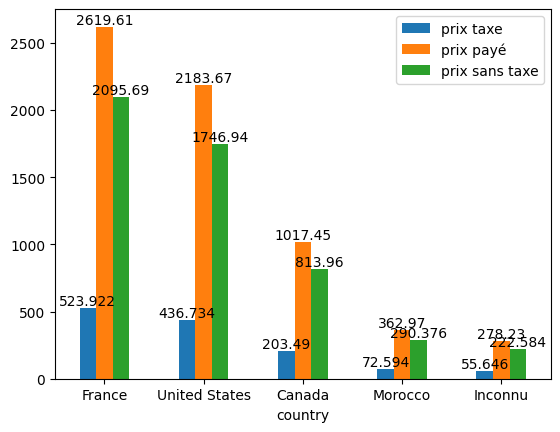

In [90]:
plt.figure(figsize = (1,1))
ax = country_price.plot(kind = 'bar')
plt.xticks(rotation = 0)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation = 0)
plt.show()


In [80]:
country_price

,prix taxe,prix payé,prix sans taxe
country,,,
France,523.922,2619.61,2095.688
United States,436.734,2183.67,1746.936
Canada,203.490,1017.45,813.960
Morocco,72.594,362.97,290.376
Inconnu,55.646,278.23,222.584
